In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [3]:
# display options

pd.set_option('max_colwidth', 800)
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
os.getcwd()

'/home/siddharth/workspace-jn/Gas_compressor_failure_prediction'

In [5]:
# loading pickled dataset

with open('dataset_pkl_file','rb') as f:
    df = pickle.load(f)

In [6]:
df.head()

,lever,speed,gt_shaft_tq,gt_speed,cpp_th,cpp_tn,shaft_tq_pt,shaft_rpm_pt,shaft_tq_Q,shaft_rpm_stbd,hp_turb_ex_T,gg_speed,ff_mf,abb_Tic,gt_cmpr_outP,gt_cmpr_outT,pext_bar,hp_turb_outP,tcs_signal,th_coef_st,prop_rps,th_coef_pt,prop_rps_pt,prop_tq_pt,prop_tq_st,gt_cmpr_dcy
0,1.1379,3,7252.5,1357.6,7.8001,7.8001,40835,59.448,40835,59.448,626.67,6668.7,0.29895,8.9076,7.1370,567.77,1.0193,1.3313,13.7460,0.016701,0.9908,0.016701,0.9908,26763,26763,1.0
1,2.0883,6,3919.9,1378.8,27.7590,27.7590,62949,60.379,62949,60.379,497.23,6828.2,0.13086,9.2824,6.6000,556.11,1.0200,1.2416,2.0249,0.054159,1.0063,0.054159,1.0063,45078,45078,1.0
2,3.1438,9,9446.5,1386.7,58.4290,58.4290,108000,60.725,108000,60.725,571.08,7141.7,0.23766,11.9250,7.6004,576.86,1.0209,1.4260,12.0050,0.110630,1.0121,0.110630,1.0121,84240,84240,1.0
3,4.1613,12,16777.0,1547.5,108.8700,108.8700,192000,67.765,192000,67.765,627.27,7912.7,0.34351,17.4860,9.2191,604.12,1.0236,1.7361,17.3520,0.167790,1.1294,0.167790,1.1294,164000,164000,1.0
4,5.1404,15,24683.0,1924.8,168.1500,168.1500,282000,84.289,282000,84.289,699.01,8560.2,0.51479,26.2210,11.5450,637.42,1.0279,2.1933,26.0030,0.173170,1.4048,0.173170,1.4048,253000,253000,1.0


In [7]:
df.columns

Index(['lever', 'speed', 'gt_shaft_tq', 'gt_speed', 'cpp_th', 'cpp_tn',
       'shaft_tq_pt', 'shaft_rpm_pt', 'shaft_tq_Q', 'shaft_rpm_stbd',
       'hp_turb_ex_T', 'gg_speed', 'ff_mf', 'abb_Tic', 'gt_cmpr_outP',
       'gt_cmpr_outT', 'pext_bar', 'hp_turb_outP', 'tcs_signal', 'th_coef_st',
       'prop_rps', 'th_coef_pt', 'prop_rps_pt', 'prop_tq_pt', 'prop_tq_st',
       'gt_cmpr_dcy'],
      dtype='object')

## List of parameters

> **Independent features**
- Lever (lp) [ ]
- Speed [knots]
- Gas Turbine shaft torque (GTT) [kN m]
- Gas Turbine Speed (GT rpm) [rpm]
- Controllable Pitch Propeller Thrust stbd (CPP T stbd)[N]
- Controllable Pitch Propeller Thrust port (CPP T port)[N]
- Shaft Torque port (Q port) [kN]
- Shaft rpm port (rpm port)[rpm]
- Shaft Torque stbd (Q stdb) [kN]
- Shaft rpm stbd (rpm stbd) [rpm]
- HP Turbine exit temperature (T48) [C]
- Generator of Gas speed (GG rpm) [rpm]
- Fuel flow (mf) [kg/s]
- ABB Tic control signal (ABB Tic) []
- GT Compressor outlet air pressure (P2) [bar]
- GT Compressor outlet air temperature (T2) [C]
- External Pressure (Pext) [bar]
- HP Turbine exit pressure (P48) [bar]
- TCS tic control signal (TCS tic) []
- Thrust coefficient stbd (Kt stbd) []
- Propeller rps stbd (rps prop stbd) [rps]
- Thrust coefficient port (Kt port) []
- Propeller rps port (rps prop port) [rps]
- Propeller Torque port (Q prop port) [Nm]
- Propeller Torque stbd (Q prop stbd) [Nm]

> **Dependent feature**
- GT Compressor decay state coefficient (KMcompr)

In [8]:
# renaming the columns name

new_col_li = ['lever', 'speed', 'gt_shaft_tq', 'gt_shaft_sp', 'cp_prop_th_stb', 'cp_prop_th_prt',
       'shaft_tq_prt', 'shaft_rpm_prt', 'shaft_tq_stb', 'shaft_rpm_stb',
       'hp_turb_ex_T', 'gg_speed', 'ff_mf', 'abb_Tic', 'gt_cmpr_outP',
       'gt_cmpr_outT', 'pext_bar', 'hp_turb_outP', 'tcs_signal', 'th_coef_stb',
       'prop_rps_stb', 'th_coef_prt', 'prop_rps_prt', 'prop_tq_prt', 'prop_tq_stb',
       'gt_cmpr_dcy']

df.columns = new_col_li

In [9]:
# reordering the columns

reorder_col_li = ['lever', 'speed', 'gt_shaft_tq', 'gt_shaft_sp', 'shaft_tq_stb','shaft_tq_prt', 'shaft_rpm_stb',  'shaft_rpm_prt',
                  'cp_prop_th_stb', 'cp_prop_th_prt','prop_tq_stb', 'prop_tq_prt','prop_rps_stb','prop_rps_prt','th_coef_stb','th_coef_prt',
                  'hp_turb_ex_T','hp_turb_outP','gt_cmpr_outT', 'gt_cmpr_outP','gg_speed', 'ff_mf',  'pext_bar','abb_Tic', 'tcs_signal',
                  'gt_cmpr_dcy']

df = df.loc[:,reorder_col_li]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589223 entries, 0 to 589222
Data columns (total 26 columns):
lever             589223 non-null float64
speed             589223 non-null int64
gt_shaft_tq       589223 non-null float64
gt_shaft_sp       589223 non-null float64
shaft_tq_stb      589223 non-null int64
shaft_tq_prt      589223 non-null int64
shaft_rpm_stb     589223 non-null float64
shaft_rpm_prt     589223 non-null float64
cp_prop_th_stb    589223 non-null float64
cp_prop_th_prt    589223 non-null float64
prop_tq_stb       589223 non-null int64
prop_tq_prt       589223 non-null int64
prop_rps_stb      589223 non-null float64
prop_rps_prt      589223 non-null float64
th_coef_stb       589223 non-null float64
th_coef_prt       589223 non-null float64
hp_turb_ex_T      589223 non-null float64
hp_turb_outP      589223 non-null float64
gt_cmpr_outT      589223 non-null float64
gt_cmpr_outP      589223 non-null float64
gg_speed          589223 non-null float64
ff_mf            

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lever,589223.0,5.166087,2.626230,1.137900,3.14380,5.14040,7.14810,9.3000
speed,589223.0,14.998177,7.745928,3.000000,9.00000,15.00000,21.00000,27.0000
gt_shaft_tq,589223.0,29929.568972,24178.106721,241.320000,8845.60000,23814.00000,44822.00000,83143.0000
gt_shaft_sp,589223.0,2135.231645,770.738707,1306.900000,1386.80000,1924.60000,2678.10000,3570.3000
shaft_tq_stb,589223.0,341583.985729,276110.048220,34810.000000,101000.00000,272000.00000,512000.00000,950000.0000
shaft_tq_prt,589223.0,341583.985729,276110.048220,34810.000000,101000.00000,272000.00000,512000.00000,950000.0000
shaft_rpm_stb,589223.0,93.502109,33.750726,57.228000,60.72600,84.27800,117.27000,156.3500
shaft_rpm_prt,589223.0,93.502109,33.750726,57.228000,60.72600,84.27800,117.27000,156.3500
cp_prop_th_stb,589223.0,232.376110,201.792355,5.307600,60.87800,181.07000,352.15000,694.3300
cp_prop_th_prt,589223.0,232.376110,201.792355,5.307600,60.87800,181.07000,352.15000,694.3300


---

### checking for missing value

In [12]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

### Splitting for x and y

In [13]:
x_input = df.iloc[:,:-1]

In [14]:
y = df.iloc[:,-1]

---

## Univariate analysis

In [15]:
# list of columns

col_li = x_input.columns
col_li

Index(['lever', 'speed', 'gt_shaft_tq', 'gt_shaft_sp', 'shaft_tq_stb',
       'shaft_tq_prt', 'shaft_rpm_stb', 'shaft_rpm_prt', 'cp_prop_th_stb',
       'cp_prop_th_prt', 'prop_tq_stb', 'prop_tq_prt', 'prop_rps_stb',
       'prop_rps_prt', 'th_coef_stb', 'th_coef_prt', 'hp_turb_ex_T',
       'hp_turb_outP', 'gt_cmpr_outT', 'gt_cmpr_outP', 'gg_speed', 'ff_mf',
       'pext_bar', 'abb_Tic', 'tcs_signal'],
      dtype='object')

In [16]:
# Unique values for all the columns

for col in col_li:
    print(col.center(50,'*'))
    print()
    print(str(x_input[col].nunique()).center(50))
    print()

**********************lever***********************

                        9                         

**********************speed***********************

                        9                         

*******************gt_shaft_tq********************

                      90428                       

*******************gt_shaft_sp********************

                       2524                       

*******************shaft_tq_stb*******************

                      26429                       

*******************shaft_tq_prt*******************

                      26429                       

******************shaft_rpm_stb*******************

                       5622                       

******************shaft_rpm_prt*******************

                       5622                       

******************cp_prop_th_stb******************

                      69272                       

******************cp_prop_th_prt******************

            

In [17]:
# value count for the columns where nunique()<10

value_counts = [col for col in col_li if x_input[col].nunique()<10]

for col in value_counts:
    print(col.center(50,'*'))
    print(str(x_input[col].value_counts().sort_index()).center(50))
    print()

**********************lever***********************
1.1379    65492
2.0883    65486
3.1438    65467
4.1613    65487
5.1404    65473
6.1746    65487
7.1481    65489
8.2059    65344
9.3000    65498
Name: lever, dtype: int64

**********************speed***********************
3     65492
6     65486
9     65467
12    65487
15    65473
18    65487
21    65489
24    65344
27    65498
Name: speed, dtype: int64



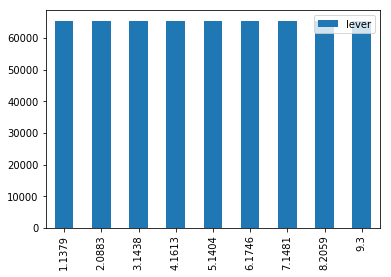

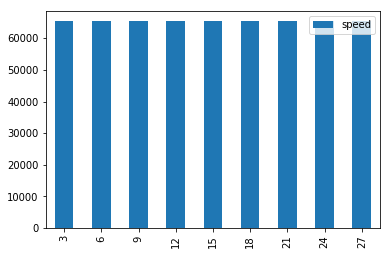

In [18]:
# plotting for value counts for lever position and speed

for col in value_counts:
    x_input[col].value_counts().sort_index().plot.bar(label=col)
    plt.legend()
    plt.show()
    



In [19]:
# different classes of y
y.nunique()

15

In [20]:
# count of diffent classes

y.value_counts()

1.00000    73707
0.97857    36858
0.98214    36855
0.97500    36853
0.96429    36853
0.98929    36852
0.96786    36852
0.97143    36850
0.98571    36850
0.96071    36848
0.95357    36847
0.95000    36846
0.95714    36845
0.99643    36843
0.99286    36464
Name: gt_cmpr_dcy, dtype: int64

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


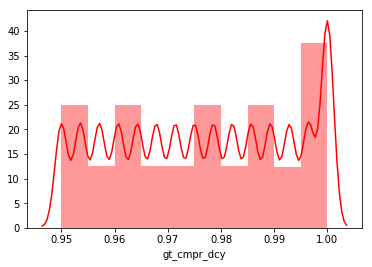

In [21]:
# distribution of y(target)
sns.distplot(y,bins = 10,color = 'red')

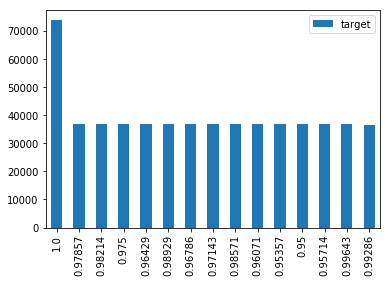

In [22]:
#plotting the y counts 

y.value_counts().plot.bar(label = 'target')
plt.legend()
plt.show()


/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


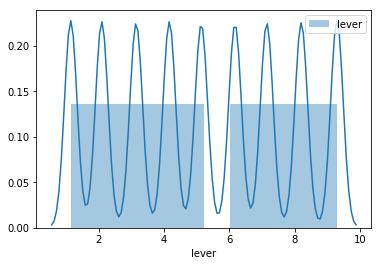

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


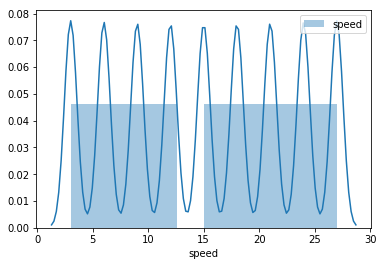

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


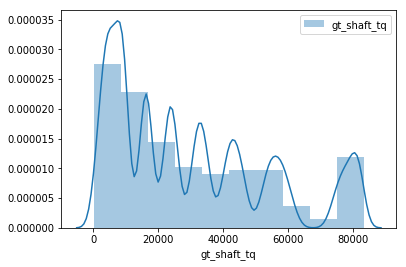

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


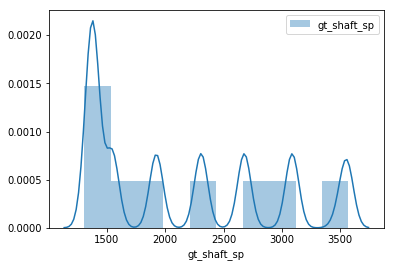

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


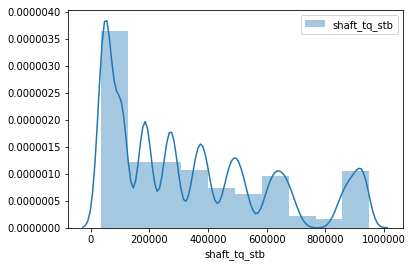

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


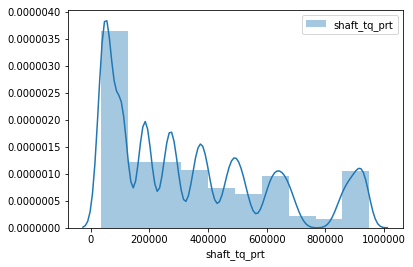

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


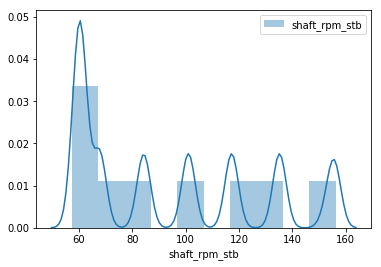

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


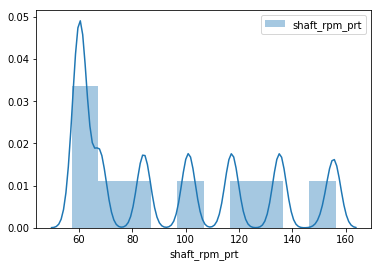

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


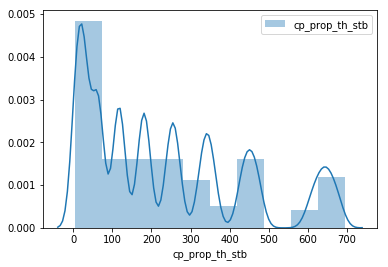

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


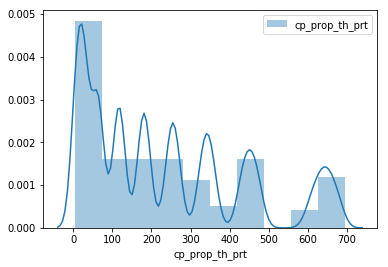

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


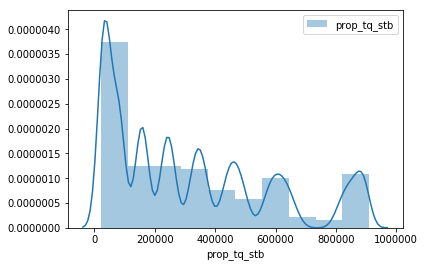

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


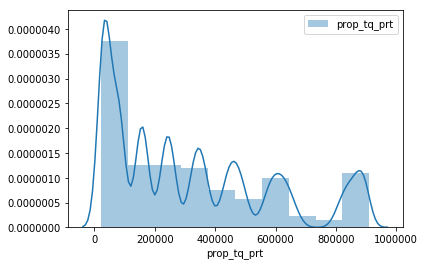

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


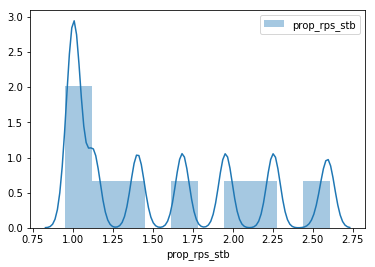

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


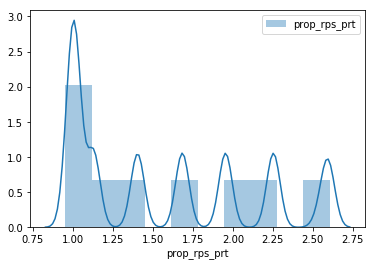

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


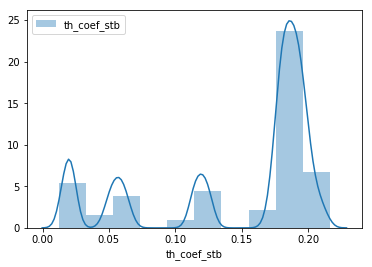

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


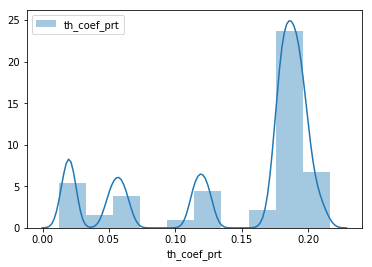

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


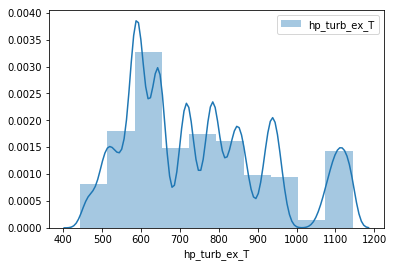

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


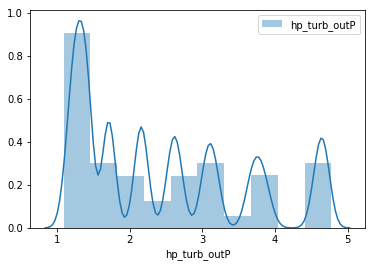

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


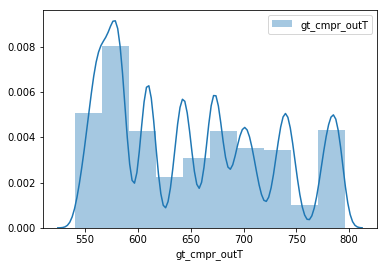

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


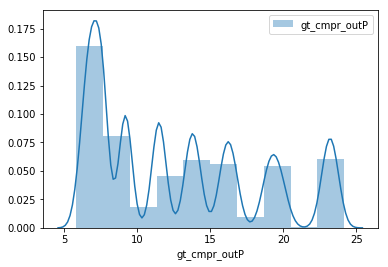

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


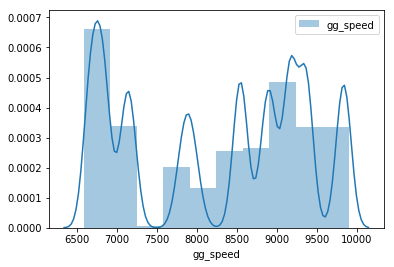

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


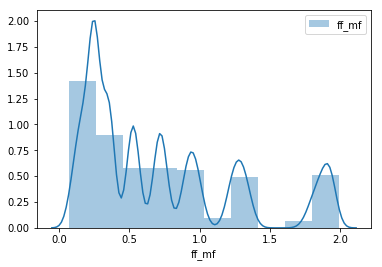

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


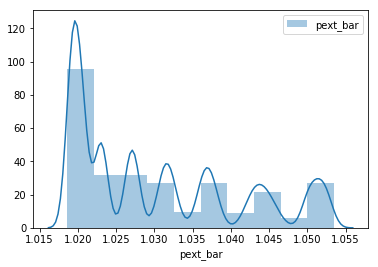

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


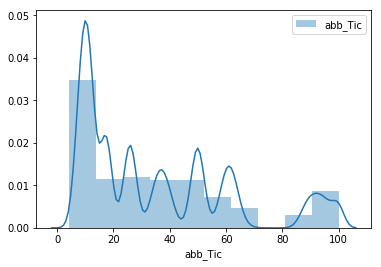

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


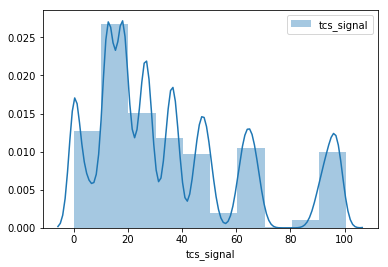

In [23]:
# plotting distribution of all the independent features

for col in col_li:
    sns.distplot(x_input[col],bins=10,norm_hist=True,label=col)
    plt.legend()
    plt.show()

---

## Bivariate analysis

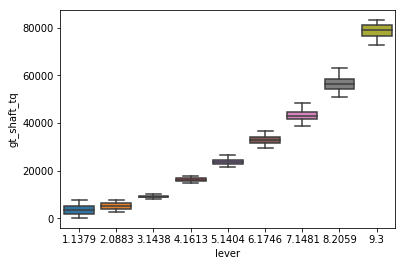

In [24]:
sns.boxplot(data=x_input,x='lever',y='gt_shaft_tq')

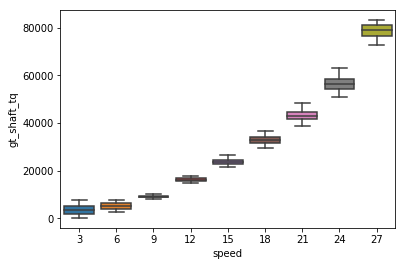

In [25]:
sns.boxplot(data=x_input,x='speed',y='gt_shaft_tq')

---

/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/siddharth/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


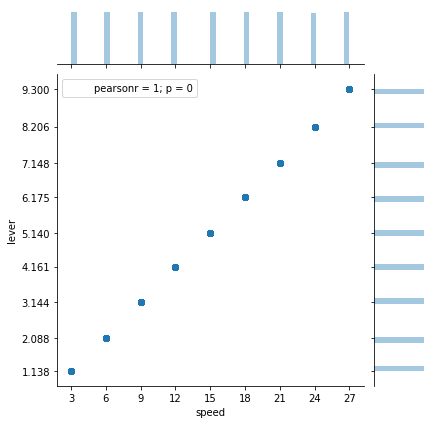

In [26]:
g = sns.jointplot('speed','lever',data=x_input)
g.ax_joint.set_xticks(x_input['speed'].unique())
g.ax_joint.set_yticks(x_input['lever'].unique())

---

## Multivariate analysis

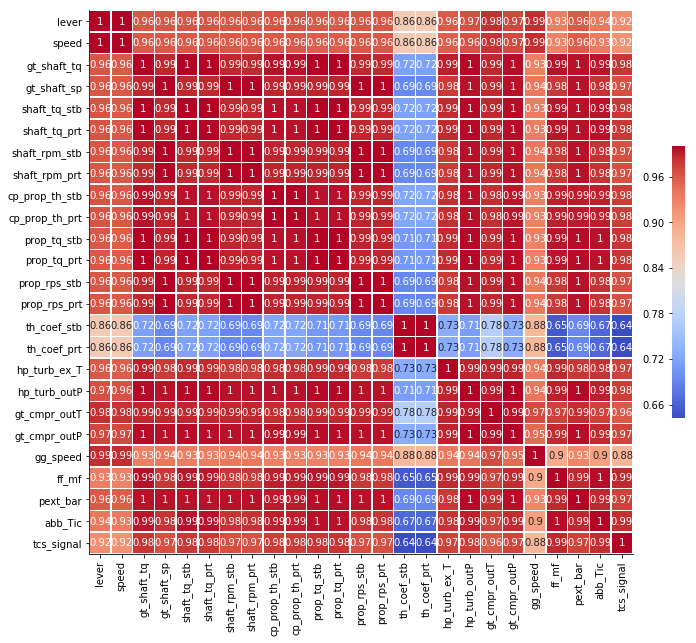

In [27]:
g  = sns.heatmap(x_input.corr(),xticklabels=x_input.columns,yticklabels=x_input.columns,cbar_kws={"shrink": .5}, linewidths=.5,square=True,annot=True,cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()